# Part 1

Q1: Use library scripts to generate p-ER random graphs and
r-regular random graph. Let K denote the number of nodes.

In [30]:
import networkx as nx
import numpy as np
import scipy
import matplotlib.pyplot as plt
import timeit
from numpy.random import randint
import random
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def g_ER(K, p): # an edge is included with probability p independently of any other edge
    G_p = nx.erdos_renyi_graph(K, p)
    return G_p
def g_r(K, r): # K>r>=3 and Kr is EVEN
    G_r = nx.random_regular_graph(r, K)  
    return G_r

Q2: Write a script to check the connectivity of a given graph.

1. The irreducibility method involves computing the product of matrices until all paths have been accounted for and then checking if any entries in the resulting matrix are non-zero.

In [5]:
def connectivity_irreducible(G):
    A= nx.adjacency_matrix(G).toarray()
    n=A.shape[0]
    sum_matrix=np.linalg.matrix_power(np.add(np.eye(n),A),n-1)
    if np.all(sum_matrix >0): 
        return True
    else:
        return False

2. The eigenvalue method involves computing the eigenvalues of the Laplacian matrix and checking if the second smallest eigenvalue is positive.

In [6]:
def eigenvalue_Laplace_matrix(G):
    lap_matrix = nx.laplacian_matrix(G).toarray()
    eigval = np.linalg.eigvalsh(lap_matrix)
    np.sort(eigval)
    if eigval[1]>0:
        return True
    else:
        return False

3. The breadth-first search algorithm involves starting from a node and visiting all reachable nodes using a queue and then checking if all nodes have been visited. If we encounter a node with a distance of infinity, it implies that the node is not reachable, and therefore, the graph is not connected.

In [7]:
import queue

def BFS(G, root):
    distance = {}
    parent = {}
    for n in G:
        distance[n] = float('inf')
        parent[n] = []
    
    Q = queue.Queue()
    distance[root] = 0
    Q.put(root)
    while Q.empty() != True:
        current = Q.get()
        neighbors = G.neighbors(current)
        for n in neighbors:
            if distance[n] == float('inf'):
                distance[n] = distance[current] + 1
                parent[n] = current
                Q.put(n)
    
    return distance

def check_connectivity_BFS(G, root): 
    distance = BFS(G, root)
    for node in distance:
        if distance[node] == float('inf'):  
            return False
        
    return True

In this example, we generate a p-ER random graph with 110 nodes and a probability of edge creation of 0.2.

In [8]:
G = nx.erdos_renyi_graph(110, 0.2)

In [9]:
print('is_connect:',nx.is_connected(G))
print('irreducibility:',connectivity_irreducible(G))
print('eigenvalue of the Laplacian matrix:', eigenvalue_Laplace_matrix(G))
print('BFS:',check_connectivity_BFS(G,0))

is_connect: True
irreducibility: True
eigenvalue of the Laplacian matrix: True
BFS: True


Q3: Compare the complexity as a function of K of the methods
above by plotting curves of a complexity measure vs K.

In [31]:
from sklearn import preprocessing

def plot_of_complexity(Graph_type):
    time_irreduc=list()
    time_BFS=list()
    time_Lapl=list()
    Kmax=500
    for K in range(3,Kmax):
        if Graph_type == 0: # p-ER random graph
            G = g_ER(K,0.2)

        elif Graph_type == 1: # r-regular random graph
            G = g_r(K,2)
        
        start_irr = timeit.default_timer()
        connectivity_irreducible(G)
        stop_irr = timeit.default_timer()
        time_irreduc.append(stop_irr - start_irr) 

        start_BFS = timeit.default_timer()
        check_connectivity_BFS(G,0)
        stop_BFS = timeit.default_timer()
        time_BFS.append(stop_BFS - start_BFS)

        start_Lapl = timeit.default_timer()
        eigenvalue_Laplace_matrix(G)
        stop_Lapl = timeit.default_timer()
        time_Lapl.append(stop_Lapl - start_Lapl)

    
    K=list(range(3,Kmax))
    plt.figure(figsize=(15, 10))
    plt.plot(K, time_irreduc ,'r', label='Irreducibility')
    plt.plot(K, time_BFS, 'g', label='BFS')
    plt.plot(K, time_Lapl, 'b', label='Eigenvalue Laplace Matrix')
    plt.xlabel('Number of nodes K', fontsize=14)
    plt.ylabel('Complexity Time', fontsize=14)
    plt.legend(fontsize = 20)

    if Graph_type == 0:
        plt.title("Complexity of the three algorithms checking connectivity of a p-ER random graph",  fontsize = 16)

    else:
        plt.title("Complexity of the three algorithms checking connectivity of a r-regular random graph",  fontsize = 16)
        
    plt.grid()
    plt.xscale('log')
    plt.show()

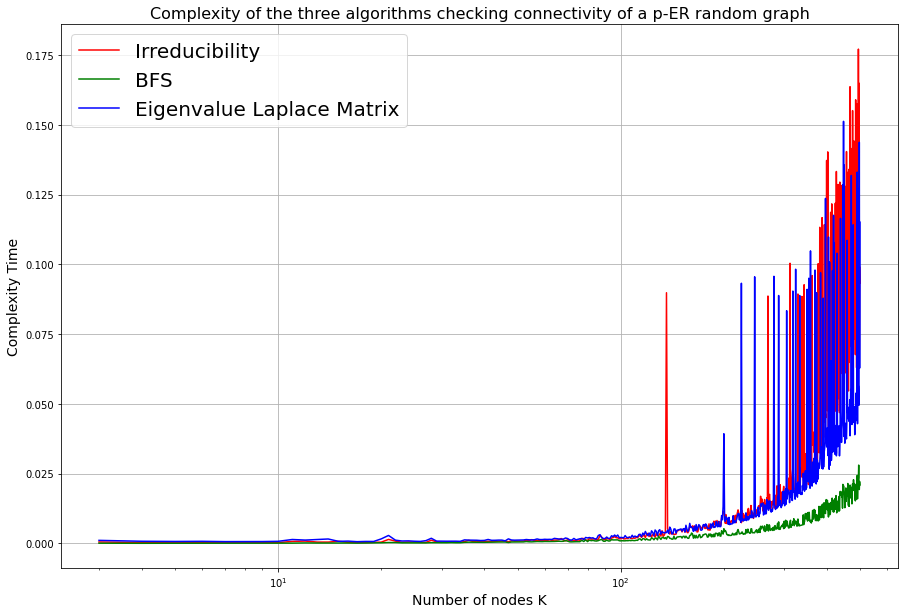

In [33]:
plot_of_complexity(Graph_type = 0) # p-ER random graph

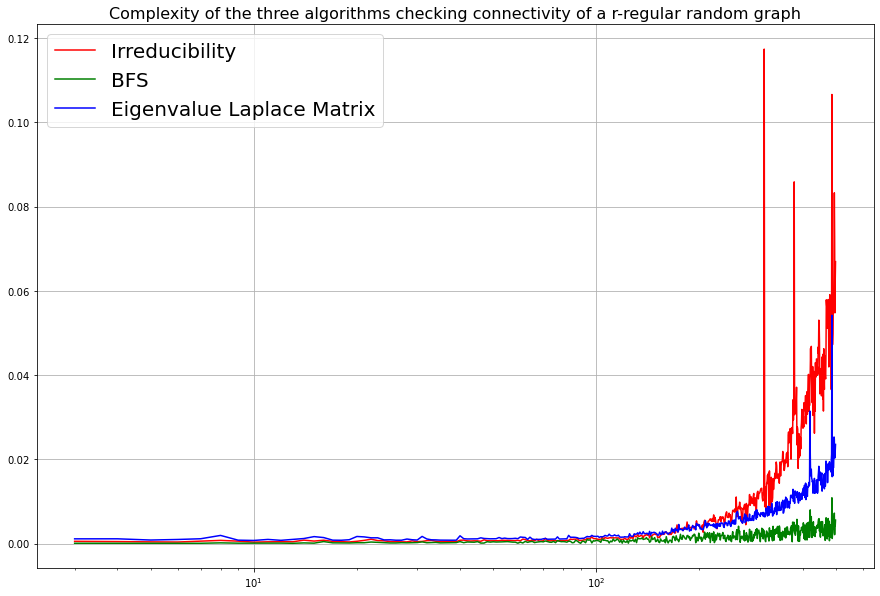

In [ ]:
plot_of_complexity(Graph_type = 1) # r-regular random graph

Q4: Let pc (G) denote the probability that a graph G is connected.
By running Monte Carlo simulations, estimate pc (G) and
produce two curve plots:
- pc (G) vs. p for Erd˝os-R´enyi graphs with K = 100;
- pc (G) vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.


In [23]:
def MonteCarlo_ER(sim_p):
    K=50
    data=list()
    for p in np.linspace(0, 1, 100):
        Result_sim=list()
        for i in range(sim_p):
            G=g_ER(K,p)
            Result_sim.append(check_connectivity_BFS(G,0)) 
        data.append((p,np.mean(Result_sim),np.std(Result_sim)))
    data=sorted(data, key=lambda x: x[0])
    return(data)

In [24]:
def MonteCarlo_r(r,sim_K):
    data=list()
    for K in list(range(r+1,101)):
        Result_sim=list()
        for i in range(sim_K):
            G=g_r(K,r)
            Result_sim.append(check_connectivity_BFS(G,0)) 
        data.append((K,np.mean(Result_sim),np.std(Result_sim)))
    data=sorted(data, key=lambda x: x[0]) 
    return(data)

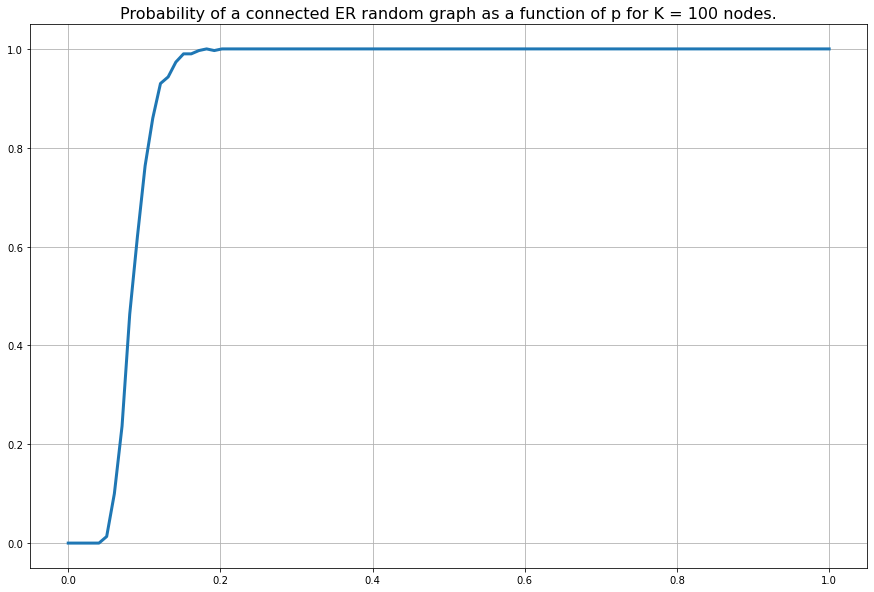

In [48]:
data_ER=MonteCarlo_ER(300)
x_ER=[i[0] for i in data_ER]
y_ER=[i[1] for i in data_ER]

plt.figure(figsize=(15, 10))
plt.plot(x_ER, y_ER, linewidth = 3)
plt.title("Probability of a connected ER random graph as a function of p for K = 100 nodes.", fontsize=16)
plt.grid()

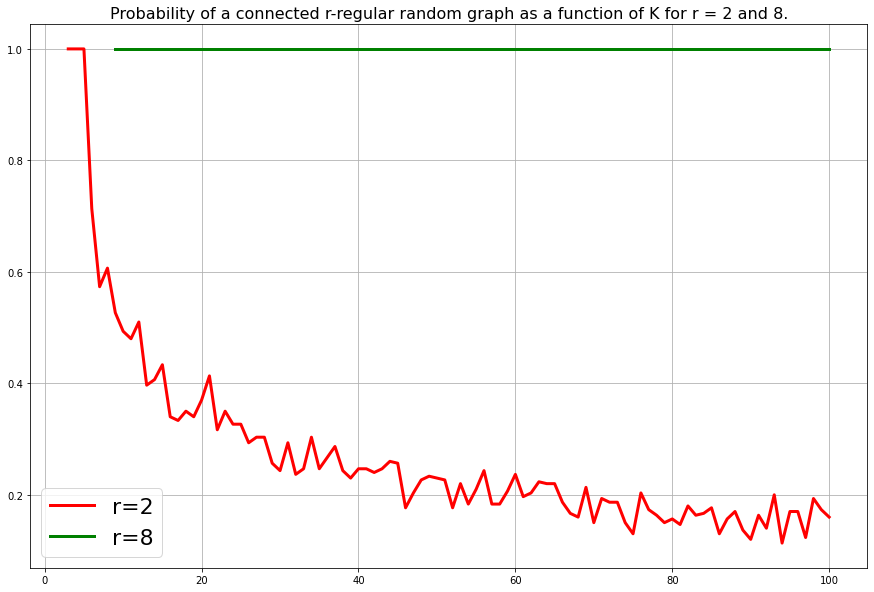

In [49]:
data_r2=MonteCarlo_r(2,300)
x_r2=[i[0] for i in data_r2]
y_r2=[i[1] for i in data_r2]
##############################
data_r8=MonteCarlo_r(8,300)
x_r8=[i[0] for i in data_r8]
y_r8=[i[1] for i in data_r8]

plt.figure(figsize=(15, 10))
plt.plot(x_r2,y_r2,'r',label='r=2', linewidth = 3)
plt.plot(x_r8,y_r8,'g',label='r=8', linewidth = 3)
plt.legend(fontsize=22)
plt.title("Probability of a connected r-regular random graph as a function of K for r = 2 and 8.", fontsize=16)
plt.grid()
plt.show()

# Part 2

Q1: Give a concise and accurate formal statement of the algorithm
you use to evaluate the mean response time (i.e., how you
conduct the statistical experiment to collect samples of R).


In order to collect samples of R, we repeat our algorithm multiple times while
varying N from 1 to 10000. The purpose of the algorithm is to simulate the
behavior of a distributed system with N servers and two different topologies
design (FatTree or Jellyfish) and evaluate its mean response time ER. We
calculate it as follows:

$ER = max(TotalTransferTime) + ServerTime$


1. The Server Time is the mean processing time of the server to complete its task and is equal to T0 + EX /N , where T0 is a fixed processing time, EX is the variable processing time and N is the number of servers;

2. The Total Transfer Time is the sum of the time taken to transfer input data from server A to the N servers (input time) and the time taken to transfer output data from each server to server A (output time). We transfer data using a TCP connection between server A and server i (i = 1,...,N): the choice of topology affects the throughput value since it depends on the number of hops to reach all N servers.

3. Since transmission occurs in parallel, the maximum value of the Total Transfer Time corresponds to the last server that sends back the output data (this value defines the actual transfer time).

4. Finally, we normalize the mean response time by dividing each result with the baseline, which is the time taken when only server A is used and is equal to T0 + EX.

Q2: Plot the mean response time E[R] as a function of N for N
ranging between 1 and 10000.
- Let Rbaseline be the response time in case only server A is used, i.e., the job is run locally on A.
- In the plot normalize E[R] with respect to E[Rbaseline]

In [34]:
# link capacity in Gbit/s
C = 10 * (10**9)
# transmission time of each packet in µs
tau = 5 * (10**(-6)) 
# input file size in TB
Lf = 4 * (10**12) 
# output file size in TB
Lo = 4 * (10**12) 
# expected time the server takes to process a packet in seconds
E_X = 8 * 3600 
# fixed processing time in seconds
T_0 = 30 
# protocol overhead factor
xi = 0.1 
# arrival rate of packets
f = 48/1500 
# links 
n = 64 

In a Fat Tree network topology, if the server is located in the same pod and is adjacent to the switch, it can be reached in just 2 hops. If the server is in the same pod but not adjacent to the switch, it will require 4 hops to reach it.

However, if the server is located in a different pod, it will require six hops to reach it. This is because the traffic will need to pass through multiple levels of switches in order to reach the destination pod and then travel down to the server.

In [38]:
def hops_FatTree(i):
    if i in range(1,32):
        return 2
    elif i in range(32,32*31+1):
        return 4
    else:
        return 6

In the Jellyfish network topology, we assume that we start with a single switch. From this switch, we can reach up to 31 servers within just 2 hops. This is because each switch is directly connected to 31 other switches.

The initial switch is connected to 32 other switches. To reach servers connected to those switches, we will need to make 3 hops in total (we go from the initial switch to one of the 32 connected switches, then to another switch connected to that switch and finally to the server).

We can reach any of the 32^3 = 32,768 switches within 4 hops.

In [60]:
def hops_JellyFish(i):
    if i in range(1,32):
        return 2
    elif i in range(32,32*32+1):
        return 3
    elif i in range(32*32+1,32*32*32+1):
        return 4

In [85]:
def compute_ER(N, topology):
    thetas = [C]
    if topology == 0: #FatTree
        #evaluating the throughput 
        T_reciprocal = [1/(2*tau*hops_FatTree(i)) for i in range(1,N+1)]
        T_rec_sum = np.cumsum(T_reciprocal)
        for i in range(1, N):
            thetas.append(C*T_reciprocal[i]/T_rec_sum[i])

    elif topology == 1: # Jellyfish
        # evaluating the throughput
        T_reciprocal = [1/(2*tau*hops_JellyFish(i)) for i in range(1,N+1)]
        T_rec_sum = np.cumsum(T_reciprocal)
        for i in range(1, N):
            thetas.append(C*T_reciprocal[i]/T_rec_sum[i])

    # runningtime for server i
    Server_time=T_0 + E_X/N

    # evaluating the sizes of the files we'll have to send from A to the N servers (input data)
    Lf_i = Lf/N
    Lf_new = Lf_i + f*Lf_i

    # evaluating the sizes of the files we'll have to send from the N servers to the output
    Lo_mean = Lo/N # since we want to evaluate the mean of R, we take the mean of L_0,i that is a uniform rv
    Lo_mean_new = Lo_mean + f*Lo_mean

    # evaluating the trasfer time for each server
    input_time = [Lf_new/theta for theta in thetas]
    output_time = [Lo_mean_new/theta for theta in thetas]

    # summing up the cumulative times we employ in transferring data (those times are already mean values)
    tot_transf_time = [np.sum(x) for x in zip(input_time, output_time)]

    # returning only the maximum value of the transferring times (so we pick the last server to send back the output data) 
    # + the mean running time of the server to process the task
    return(np.max(tot_transf_time) + Server_time) 
            

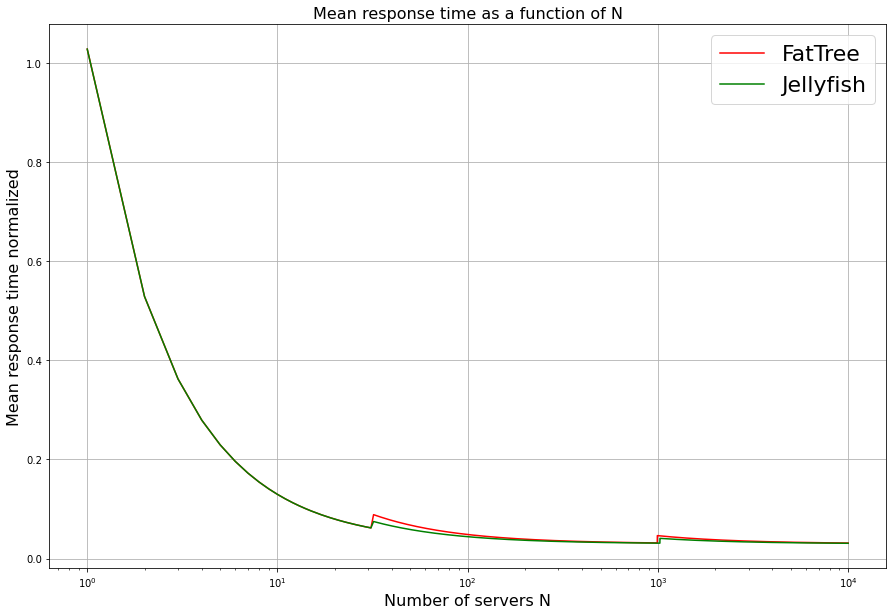

In [88]:
N_values = range(1, 10001)

ER_baseline = T_0 + E_X
mean_response_time_Fat_Tree = [compute_ER(N, 0) for N in N_values]
mean_response_time_Jelly_Fish = [compute_ER(N, 1) for N in N_values]

mean_response_time_Fat_Tree_norm = np.array(mean_response_time_Fat_Tree) / ER_baseline
mean_response_time_Jelly_Fish_norm = np.array(mean_response_time_Jelly_Fish) / ER_baseline

plt.figure(figsize=(15, 10))
plt.plot(N_values, mean_response_time_Fat_Tree_norm, 'r', label='FatTree')
plt.plot(N_values, mean_response_time_Jelly_Fish_norm, 'g', label='Jellyfish')
plt.legend(fontsize = 22)
plt.xscale('log')
plt.xlabel('Number of servers N', fontsize=16)
plt.ylabel('Mean response time normalized', fontsize=16)
plt.title('Mean response time as a function of N', fontsize=16)
plt.grid()
plt.show()

Q3: Plot the Job running cost S as a function of N for N ranging
between 1 and 10000.

- Let Sbaseline be the Job running cost in case only server A is
used, i.e., the job is run locally on A.
- In the plot normalize S with respect to Sbaseline.

The Job running cost S is defined as

S = E[R] + ξ E[Θ]

where E[Θ] is the average server time used to run the job and Θ is the time that server A is used, if the job runs locally on A. 

Otherwise, Θ is the sum of the times that all N servers are
used to run their respective tasks.

In [89]:
ES_baseline = T_0 + E_X + xi * (T_0 + E_X)
E_theta = [N*(T_0 + E_X/N) for N in N_values]   
xi_theta = [xi * k for k in E_theta]                        
ES_Fat_Tree = [np.sum(x) for x in zip(mean_response_time_Fat_Tree, xi_theta)]
ES_normalized_Fat_Tree = [j/ES_baseline for j in ES_Fat_Tree]

ES_Jelly_Fish = [sum(x) for x in zip(mean_response_time_Jelly_Fish, xi_theta)]
ES_normalized_Jelly_Fish = [j/ES_baseline for j in ES_Jelly_Fish]

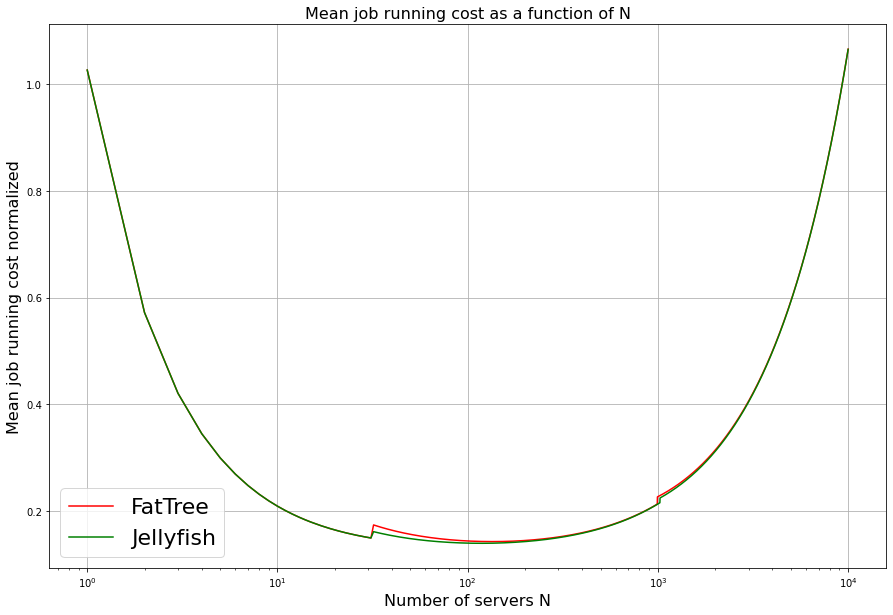

In [90]:
plt.figure(figsize=(15,10))
plt.plot(N_values, ES_normalized_Fat_Tree, 'r', label='FatTree')
plt.plot(N_values, ES_normalized_Jelly_Fish, 'g', label='Jellyfish')
plt.legend(fontsize = 22)
plt.xscale('log')
plt.xlabel('Number of servers N', fontsize = 16)
plt.ylabel('Mean job running cost normalized', fontsize = 16)
plt.title('Mean job running cost as a function of N', fontsize = 16)
plt.grid()
plt.show()